In [1]:
#basic librarie and data procesing

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Loading data
retail = pd.read_excel(r'C:\Users\Lisa Sagar\OneDrive\Desktop\Assignmnet\mentor mind final project\Online Retail.xlsx')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# taking a separate data without impacting the original data.
retail_copy=retail.copy()

In [4]:
retail_copy['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
#EDA
retail_copy.shape

(541909, 8)

In [6]:
retail_copy.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
retail_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
# Data cleaning  and checking null values
retail_copy.isnull().sum()*100/len(retail_copy)

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Data Preprocessing

In [9]:
#Removing the missing values
retail_copy.dropna(inplace=True)
retail_copy.reset_index(drop=True,inplace=True)
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [10]:
retail_copy.isnull().sum()*100/len(retail_copy)

InvoiceNo      0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
UnitPrice      0.0
CustomerID     0.0
Country        0.0
dtype: float64

In [11]:
retail_copy.shape

(406829, 8)

#Preprocessing Data for Segmentation on RFM Analysis
#Recency: How recently have cust made a purchase?
#Frequency: How often have cust bought something?
#Monetary Value: How much money do cust spend on average when making purchases?

In [12]:
#setting the reference date to the end date of the analysis
reference_date = retail_copy['InvoiceDate'].max()

#grouping data by customer and getting the latest purchase date for each customer
grouped = retail_copy.groupby('CustomerID')['InvoiceDate'].max().reset_index()

#calculatingthe recency for each customer by subtracting the most recent purchase date from the reference date
grouped['Recency'] = (reference_date - grouped['InvoiceDate']).dt.days

#merging the recency value to the dataframe
retail_copy = retail_copy.merge(grouped[['CustomerID', 'Recency']], on='CustomerID', how='left')

In [13]:
#calculating the frequency for each customer by counting the number of purchases
frequency = retail_copy.groupby('CustomerID')['InvoiceNo'].count()

#merging the frequency value to the dataframe
retail_copy = retail_copy.merge(frequency, on='CustomerID', how='left')
retail_copy.rename(columns={'InvoiceNo_x':'InvoiceNo', 'InvoiceNo_y':'Frequency_invoice'}, inplace=True)

In [14]:
#calculating the monetary value for each customer 
monetary_value = retail_copy.groupby('CustomerID')['UnitPrice'].sum()

#merging the monetary value to the dataframe
retail_copy = retail_copy.merge(monetary_value, on='CustomerID', how='left')
retail_copy.rename(columns={'UnitPrice_x':'UnitPrice', 'UnitPrice_y':'MonetaryValue'}, inplace=True)

In [15]:
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency_invoice,MonetaryValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51


In [16]:
#finding RFM score
r_quartile = pd.qcut(retail_copy['Recency'], 4, labels=[1, 2, 3, 4])
f_quartile = pd.qcut(retail_copy['Frequency_invoice'], 4, labels=[4, 3, 2, 1])
m_quartile = pd.qcut(retail_copy['MonetaryValue'], 4, labels=[4, 3, 2, 1])
retail_copy['RFM_Score'] = r_quartile.astype(int) + f_quartile.astype(int) + m_quartile.astype(int)

In [17]:
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency_invoice,MonetaryValue,RFM_Score
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8


In [18]:
def assign_rfm_level(row):
    """
    
    This function assigns the RFM level based on the RFM score.
    :parameter: RFM scores from the dataframe
    :return: The RFM level category as string
    
    """

    if row['RFM_Score'] >= 10:
        return 'Best Customers'
    elif (row['RFM_Score'] < 10) and (row['RFM_Score'] >= 6):
        return 'Loyal Customers'
    elif (row['RFM_Score'] < 6) and (row['RFM_Score'] >= 4):
        return 'Potential Loyalists'
    elif (row['RFM_Score'] < 4) and (row['RFM_Score'] >= 2):
        return 'Promising'
    else:
        return 'Needs Attention'

retail_copy['RFM_Level'] = retail_copy.apply(assign_rfm_level, axis=1)

In [19]:
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency_invoice,MonetaryValue,RFM_Score,RFM_Level
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224.51,8,Loyal Customers
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8,Loyal Customers
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224.51,8,Loyal Customers
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8,Loyal Customers
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224.51,8,Loyal Customers


In [20]:
retail_copy['RFM_Level'].value_counts()

Loyal Customers        157856
Best Customers         122200
Potential Loyalists     67875
Promising               58898
Name: RFM_Level, dtype: int64

<Axes: xlabel='RFM_Level', ylabel='count'>

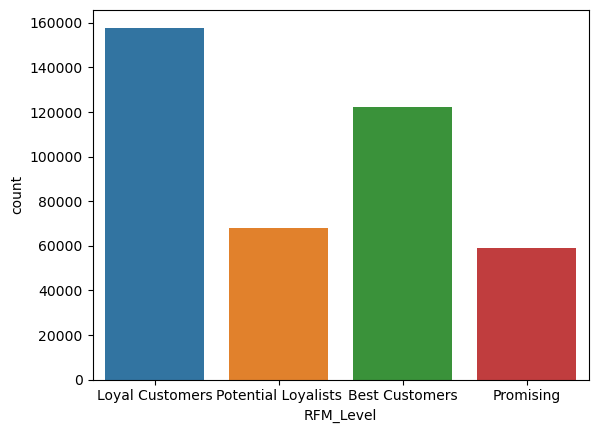

In [21]:
#barplot visualzizing the number of customers per rfm level
sns.countplot(data = retail_copy, x = 'RFM_Level')



In [22]:
#segmenting customers
segmented_customers = retail_copy.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency_invoice': 'mean',
    'MonetaryValue': ['mean', 'count']
})

In [23]:
segmented_customers

Recency Frequency_invoice MonetaryValue        
                          mean              mean          mean   count
RFM_Level                                                             
Best Customers       95.050057         68.893519    198.099685  122200
Loyal Customers      23.245680        223.296827    721.669330  157856
Potential Loyalists   7.339639        583.648987   1801.060175   67875
Promising             1.102058       3239.434887  12688.746738   58898

In [24]:
retail_copy['MonetaryValue']=retail_copy['MonetaryValue'].astype(int)

In [25]:
Final_Retail_data=retail_copy[['Recency','Frequency_invoice','MonetaryValue']]

In [26]:
#Normalizing the data
sc=StandardScaler()
scalled_data=sc.fit_transform(Final_Retail_data)
scalled_data=pd.DataFrame(scalled_data,columns=Final_Retail_data.columns)
scalled_data.head()

,Recency,Frequency_invoice,MonetaryValue
0,4.051035,-0.24575,-0.190122
1,4.051035,-0.24575,-0.190122
2,4.051035,-0.24575,-0.190122
3,4.051035,-0.24575,-0.190122
4,4.051035,-0.24575,-0.190122


In [36]:
# finding # of cluser can be using elbow method
from sklearn.cluster import KMeans
error=[]
for i in range(1,16):
    km=KMeans(n_clusters=i)
    km.fit(scalled_data)
    error.append(km.inertia_)

<Axes: >

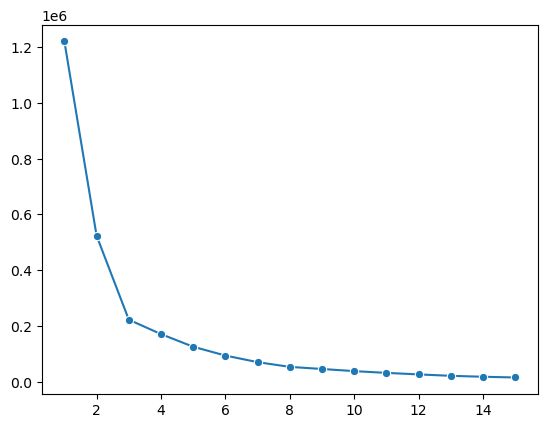

In [37]:
sns.lineplot(x=range(1,16),y=error,marker="o")

In [38]:
#build a model with 4 clusters
from sklearn.cluster import KMeans
KMeans=KMeans(n_clusters=4,init='k-means++')
KMeans.fit(scalled_data)
cluster=KMeans.fit_predict(Final_Retail_data)

In [39]:
#Assigning Cluster Labels to the Original Data
retail_copy['Cluster']=cluster
retail_copy.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Frequency_invoice,MonetaryValue,RFM_Score,RFM_Level,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,301,312,1224,8,Loyal Customers,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224,8,Loyal Customers,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,301,312,1224,8,Loyal Customers,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224,8,Loyal Customers,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,301,312,1224,8,Loyal Customers,0


In [40]:
Clustered_customers = retail_copy.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency_invoice': 'mean',
    'MonetaryValue': ['mean', 'count']
})
Clustered_customers

Recency Frequency_invoice MonetaryValue        
              mean              mean          mean   count
Cluster                                                   
0        43.419657        255.535323    698.876477  361819
1         1.475988       5540.215477  35857.620333   11036
2         4.377530       1682.606735   5472.685263   20846
3         2.290829       6505.482176  18650.084933   13128

<Axes: xlabel='Cluster', ylabel='Recency'>

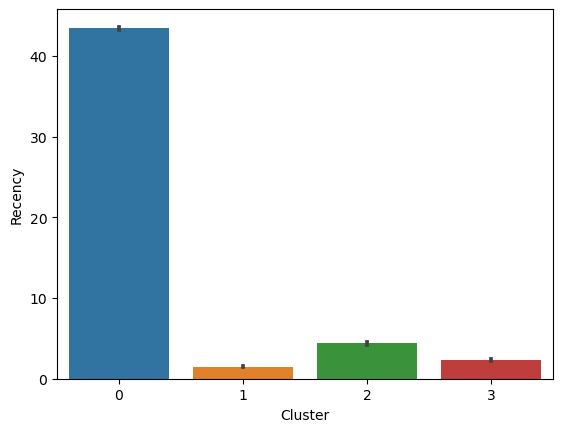

In [54]:
sns.barplot(x=retail_copy['Cluster'],y=retail_copy['Recency'])

<Axes: xlabel='Cluster', ylabel='MonetaryValue'>

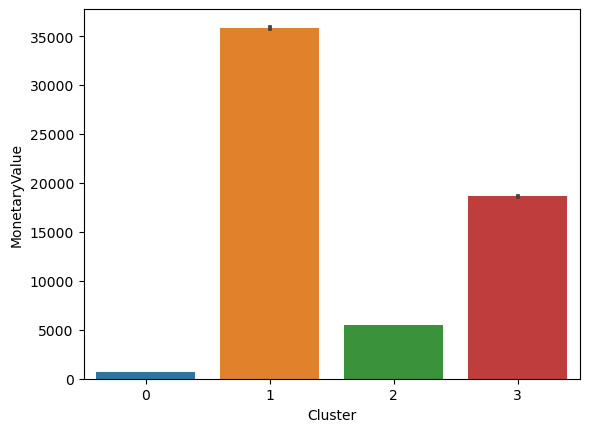

In [42]:
sns.barplot(x=retail_copy['Cluster'],y=retail_copy['MonetaryValue'])

<Axes: xlabel='Cluster', ylabel='Frequency_invoice'>

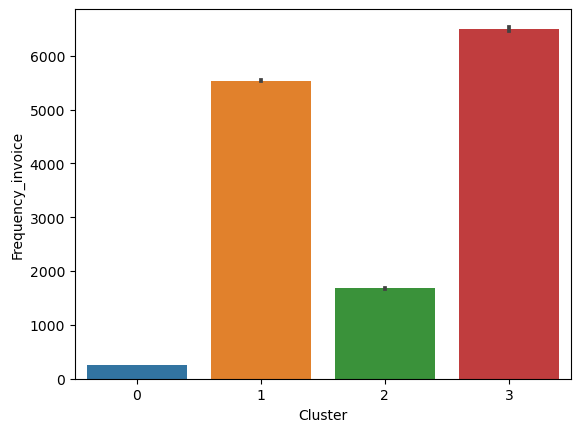

In [45]:
sns.barplot(x=retail_copy['Cluster'],y=retail_copy['Frequency_invoice'])

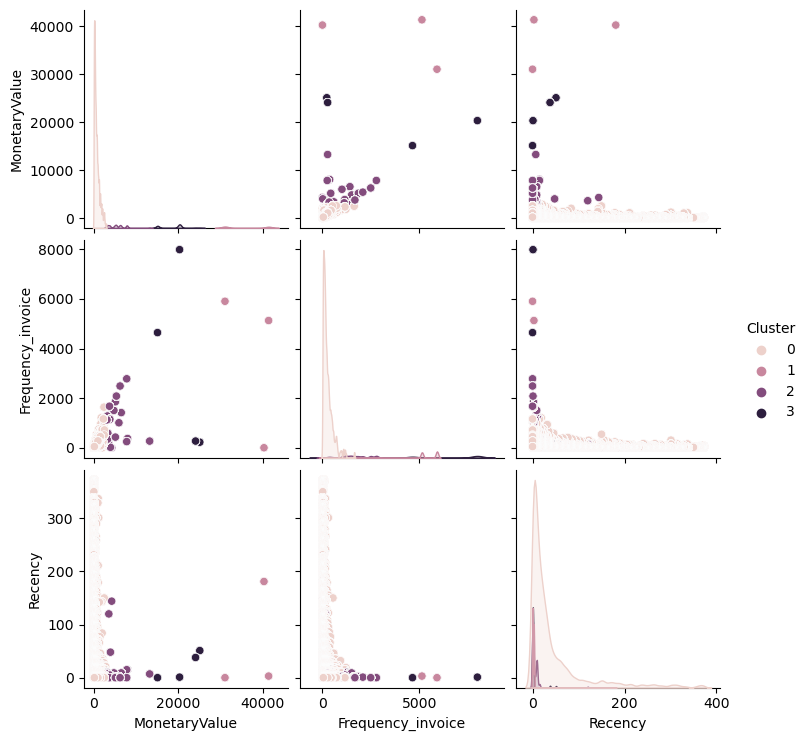

In [46]:
sns.pairplot(retail_copy[['MonetaryValue', 'Frequency_invoice', 'Recency', 'Cluster']], hue = 'Cluster')

In [47]:
retail_copy.to_csv(r'C:\Users\Lisa Sagar\OneDrive\Desktop\Assignmnet\mentor mind final project\MLcluster_retail_file.csv')

<Axes: xlabel='RFM_Level', ylabel='Cluster'>

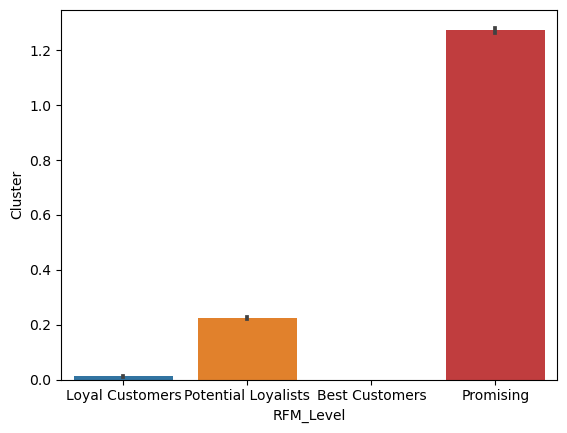

In [48]:
sns.barplot(x=retail_copy['RFM_Level'],y=retail_copy['Cluster'])

In [52]:
retail_copy['RFM_Level'].value_counts()*100/len(retail_copy['RFM_Level'])

Loyal Customers        38.801560
Best Customers         30.037190
Potential Loyalists    16.683914
Promising              14.477336
Name: RFM_Level, dtype: float64

In [53]:
retail_copy['Cluster'].value_counts()*100/len(retail_copy['Cluster'])

0    88.936384
2     5.124020
3     3.226909
1     2.712688
Name: Cluster, dtype: float64

# Summary:
Cluster 0- Doing frequent store visit and they made a purchase with less money spent
Cluster 1- Doing less store visit and purchasing more heavy price items many often
Cluster 2-Doing adequate store visit and purchasing adequate items
Cluster 3-Doing average store visit and purchasing more items with average money spent



